<a href="https://colab.research.google.com/github/Tapasyasunil/Guvi-tasks/blob/main/future_user_adoption1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and basic exploration of data

In [ ]:
import pandas as pd

In [ ]:
user_engagement = pd.read_csv('/content/takehome_user_engagement.csv')
#users = pd.read_csv('/content/takehome_users.csv')
#file takehome_users needs to be decoded , spits error

In [ ]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
users = pd.read_csv('/content/takehome_users.csv', encoding = 'latin1')

In [ ]:
users.shape

(12000, 10)

In [ ]:
user_engagement.shape

(207917, 3)

In [ ]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [ ]:

users.last_session_creation_time

0        1.398139e+09
1        1.396238e+09
2        1.363735e+09
3        1.369210e+09
4        1.358850e+09
             ...     
11995    1.378448e+09
11996    1.358275e+09
11997    1.398603e+09
11998    1.338638e+09
11999    1.390727e+09
Name: last_session_creation_time, Length: 12000, dtype: float64

#Feature engineering
- creating a feature adopted user to indicate whether user has logged in more than thrice (true or false)
- crating the domain name feature and extracting domain names from email Ids to check for domain names that 5 or more users use
- creating the adjusted email feature

In [ ]:
#checking for users who have used the app more than 3 times , using the user id 
#value counts
user_ID_counts = user_engagement['user_id'].value_counts() >=3 

In [ ]:
potential_adopted_users = [user_id for user_id in user_ID_counts.index if user_ID_counts[user_id] == True]

In [ ]:
potential_adopted_users

[3623,
 906,
 1811,
 7590,
 8068,
 9402,
 4022,
 3269,
 9312,
 7210,
 8029,
 2474,
 2658,
 8280,
 69,
 5297,
 4019,
 9083,
 2519,
 4263,
 3226,
 10599,
 6312,
 10953,
 2316,
 8426,
 603,
 2078,
 445,
 7536,
 8768,
 11428,
 6171,
 5609,
 7120,
 9281,
 10734,
 8381,
 5939,
 7572,
 5386,
 2622,
 11300,
 1822,
 2771,
 6064,
 4282,
 8912,
 6405,
 5151,
 5682,
 4402,
 5101,
 9728,
 2300,
 1769,
 9450,
 9958,
 4965,
 5240,
 2568,
 8721,
 9434,
 2620,
 4924,
 754,
 5861,
 9691,
 4143,
 6757,
 7511,
 728,
 6204,
 10524,
 8553,
 6282,
 6909,
 7375,
 4186,
 10320,
 9724,
 9325,
 10258,
 11267,
 8297,
 9582,
 10352,
 4489,
 3066,
 605,
 7431,
 4803,
 9286,
 11083,
 9042,
 5965,
 2739,
 11688,
 9601,
 10791,
 1155,
 5415,
 4234,
 9540,
 8310,
 4713,
 10656,
 4181,
 5057,
 2539,
 6978,
 4934,
 4742,
 3411,
 7153,
 6284,
 1202,
 1865,
 4745,
 3957,
 3160,
 3824,
 9771,
 7926,
 1027,
 3175,
 4835,
 63,
 9400,
 8399,
 5507,
 9645,
 783,
 2447,
 10630,
 4837,
 10602,
 4785,
 9694,
 3556,
 4248,
 7107,
 

In [ ]:
len(potential_adopted_users)

2248

In [ ]:
from datetime import datetime
from dateutil import parser

adopted_users = []

for user in potential_adopted_users:
  user_dates = user_engagement[user_engagement.user_id == user].time_stamp.tolist()
  user_dates = [parser.parse(date) for date in user_dates]
 
  queue = user_dates[0:3]
  adopted = False
  cur_index = 2

  while adopted == False:
        if ((queue[-1] - queue[0]).days <= 7):
            adopted = True
        else:
            try:
                cur_index += 1
                queue.pop(0)
                queue.append(user_dates[cur_index])
            except:
                break

  if adopted == True:
    adopted_users.append(user)

In [ ]:
adopted_users

[3623,
 906,
 1811,
 7590,
 8068,
 9402,
 4022,
 3269,
 9312,
 7210,
 8029,
 2474,
 2658,
 8280,
 69,
 5297,
 4019,
 9083,
 2519,
 4263,
 3226,
 10599,
 6312,
 10953,
 2316,
 8426,
 603,
 2078,
 445,
 7536,
 8768,
 11428,
 6171,
 5609,
 7120,
 9281,
 10734,
 8381,
 5939,
 7572,
 5386,
 2622,
 11300,
 1822,
 2771,
 6064,
 4282,
 8912,
 6405,
 5151,
 5682,
 4402,
 5101,
 9728,
 2300,
 1769,
 9450,
 9958,
 4965,
 5240,
 2568,
 8721,
 9434,
 2620,
 4924,
 754,
 5861,
 9691,
 4143,
 6757,
 7511,
 728,
 6204,
 10524,
 8553,
 6282,
 6909,
 7375,
 4186,
 10320,
 9724,
 9325,
 10258,
 11267,
 8297,
 9582,
 10352,
 4489,
 3066,
 605,
 7431,
 4803,
 9286,
 11083,
 9042,
 5965,
 2739,
 11688,
 9601,
 10791,
 1155,
 5415,
 4234,
 9540,
 8310,
 4713,
 10656,
 4181,
 5057,
 2539,
 6978,
 4934,
 4742,
 3411,
 7153,
 6284,
 1202,
 1865,
 4745,
 3957,
 3160,
 3824,
 9771,
 7926,
 1027,
 3175,
 4835,
 63,
 9400,
 8399,
 5507,
 9645,
 783,
 2447,
 10630,
 4837,
 10602,
 4785,
 9694,
 3556,
 4248,
 7107,
 

In [ ]:
len(adopted_users)

1656

In [ ]:
type(adopted_users)

list

In [ ]:
# creating adopted feature
def adopted_function(x, adopted_users_list):
    if x in adopted_users_list:
        return True
    else:
        return False

users['adopted'] = users['object_id'].apply(lambda x: adopted_function(x, adopted_users))

In [ ]:
users.adopted.value_counts()

False    10344
True      1656
Name: adopted, dtype: int64

In [ ]:
#extracting domain name from email and creating the email_domain column

In [ ]:
users['email_domain'] = users['email'].str.split('@').str[1]

In [ ]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com


In [ ]:
# create list of domains with 5 or more users 
common_emails = users.email_domain.value_counts() > 5
common_emails = [email for email in common_emails.index if common_emails[email] == True]

In [ ]:
# created adjusted email feature
def email_function(email):
    if email in common_emails:
        return email
    else:
        return 'other'
        
users['adjusted_email'] = users['email_domain'].apply(lambda x: email_function(x))

#Exploratory analysis and visualization of data 

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


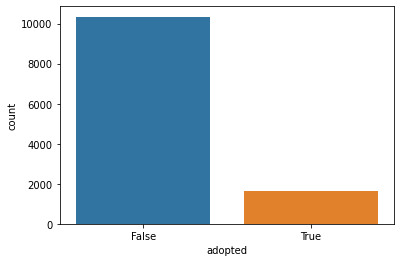

In [ ]:
sns.countplot(users['adopted'])
#visualizing adoption of product

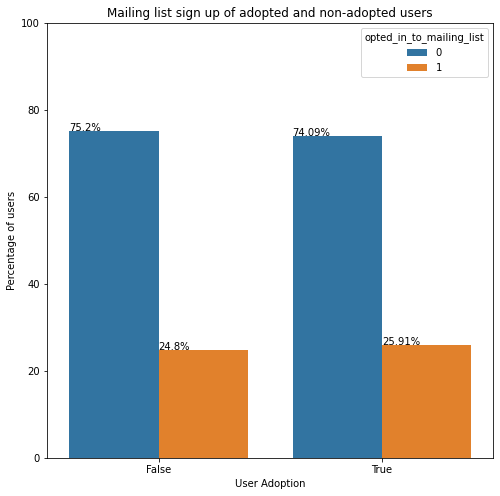

In [ ]:
#visualizing adopted vs non adopted users who have signed up to mailing list
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'opted_in_to_mailing_list'

# group df to properly show percentage
viz_df = (users.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.title('Mailing list sign up of adopted and non-adopted users')
ax1.set_ylabel('Percentage of users')
ax1.set_xlabel('User Adoption')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

- 25.91% of adopted users and 24.8% of non adopted users have signed up for the mailing list 

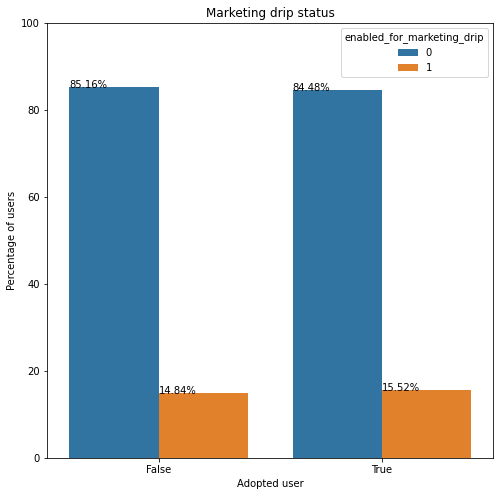

In [ ]:
#Visualizing users included in the marketing drip
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'enabled_for_marketing_drip'

# grouping to show percentages
viz_df = (users.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.title('Marketing drip status')
ax1.set_ylabel('Percentage of users')
ax1.set_xlabel('Adopted user')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

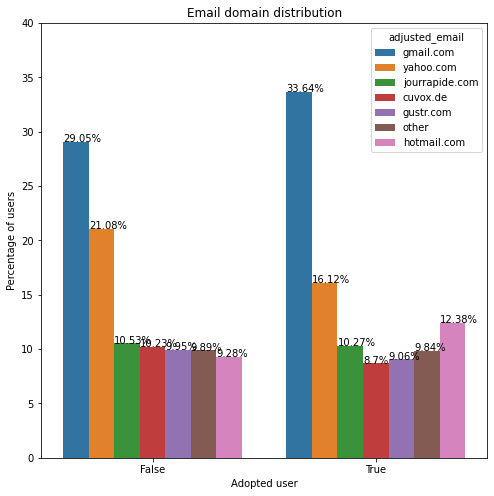

In [ ]:
#Looking at the most commonly used domain names 

fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'adjusted_email'

# group df to properly show percentage
viz_df = (users.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,40)
plt.title('Email domain distribution')
ax1.set_ylabel('Percentage of users')
ax1.set_xlabel('Adopted user')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

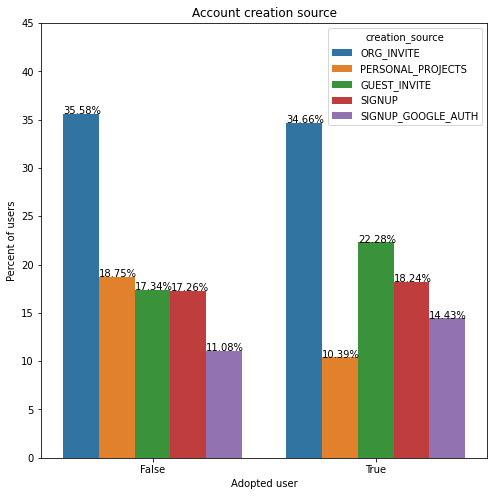

In [ ]:
#Understanding creation source of accountgs
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'creation_source'

# group df to properly show percentage
viz_df = (users.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index())
sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,45)
plt.title('Account creation source')
ax1.set_ylabel('Percent of users')
ax1.set_xlabel('Adopted user')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)


In [ ]:
# only organizations with 10 or more users are considered
common_orgs = users.org_id.value_counts() > 10
common_orgs = [org for org in common_orgs.index if common_orgs[org] == True]

org_adopted_rates = []
for org_id in common_orgs:
    org_users = users[users.org_id == org_id]
    try:
        prop_adopted = org_users.adopted.value_counts()[1]/org_users.shape[0]
    except:
        prop_adopted = 0
        
    org_adopted_rates.append(prop_adopted)

Text(0.5, 0, 'Proportion of adopted users')

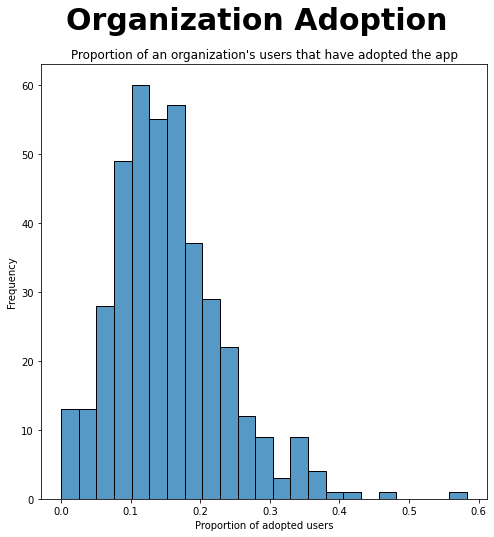

In [ ]:
fig,ax1 = plt.subplots(figsize=(8, 8))

sns.histplot(x=org_adopted_rates)

# set titles
plt.suptitle('Organization Adoption', fontsize=30, y=0.98, fontweight='bold')
plt.title("Proportion of an organization's users that have adopted the app")
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Proportion of adopted users')

In [ ]:
# imports
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

In [ ]:
df = users.copy()

In [ ]:
df_majority = df[df.adopted == False]
df_minority = df[df.adopted == True]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=df_majority.shape[0],
                                 random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
X, y = df_upsampled.iloc[:, [4, 8, 12]], df_upsampled.iloc[:, 11]
X['org_id'] = X['org_id'].apply(lambda x: str(x))
X = pd.get_dummies(X)
0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
model = LogisticRegression(max_iter=1000) # initialize model

# 5-fold cross validation
results = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
import numpy as np
np.mean(results)

0.9423381636938194

In [ ]:
# fitting the model and predict based on X_test
fittedmodel = model.fit(X_train, y_train)
predictions = fittedmodel.predict(X_test)
accuracy_score(y_test, predictions)


0.9453842435959401

In [ ]:
def plot_confusion_matrix(conf_mat, labels, model_name):
    fig,ax1 = plt.subplots(figsize=(4, 4))

    sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='d', cbar=False, square=True)

    # set + rotate labels
    ax1.set_yticklabels(labels, rotation=0, fontsize="10", va="center")
    ax1.set_xticklabels(labels, rotation=90, fontsize="10", va="top")

    # set titles
    plt.suptitle('Confusion Matrix', fontsize=18, y=1, fontweight='bold')
    plt.title(model_name, fontsize=10, style='italic')
    ax1.set_ylabel('Actual', labelpad=10, fontsize=12, fontweight='bold')
    ax1.set_xlabel('Predicted', labelpad=10,fontsize=12, fontweight='bold')

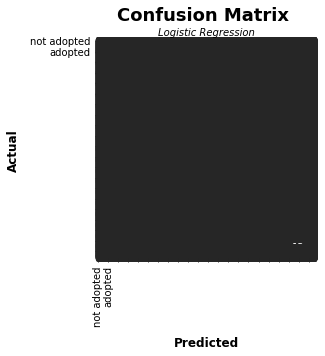

In [ ]:
conf_mat = confusion_matrix(y_test, predictions)
plot_confusion_matrix(conf_mat, ['not adopted', 'adopted'], 'Logistic Regression')

In [ ]:
#imports
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn.dummy import DummyClassifier

In [ ]:
model1 = DummyClassifier(strategy='most_frequent') # will guess the most common class, accuracy = 0.5
model2 = LogisticRegression(max_iter=1000)

p_values = []
for i in range(10):
    t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy')
    p_values.append(p)

In [ ]:
np.mean(p_values)


1.3536080047436958e-09